# ME4 Machine Learning - Tutorial 2

In [1]:
import sys
# setting path
sys.path.append('..')

from helperlib import (
    mathfunctions as hmath, 
    arrayfunctions as harray) 

import matplotlib.pyplot as plt
import numpy as np
from sklearn import (
    datasets, 
    model_selection,
    naive_bayes)

np.random.seed(5)

# Don't show plots inline
%matplotlib agg

In [2]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 1)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0], sharex=ax1)
fig.tight_layout(pad=5.0)

## 1. Prior, posterior and likelihood calculation

### 1.1. Define a function to generate the Gaussian shape

Defined in `helperlib.mathfunctions.gaussian()`

### 1.2. Define two probability distributions

define two probability distributions for $p(x|ω1)$ and $p(x|ω2)$. 

- $p(x|ω1)$ is a sum of two normal distributions/Gaussians, one with $µ=2$ and $σ=1.5$ and one with $µ=7$ and $σ=0.5$. Both are unscaled relative to each other, i.e. just summed together. 

- $p(x|ω2)$ is defined in the same way, except with Gaussians at $µ=8$ and $σ=2.5$, and $µ=3.5$ and $σ=1$. 

Generate these two probability distributions, across a range of `x` values for 200 points between -10 and 20. Scale both distributions such that they integrate to 1 overall (hint: the command `p /= np.trapz(p, x)`, where `p` is defined as a function of `x`, will divide p by the area beneath the curve). Plot these.

In [3]:
n = 200
x = np.linspace(-10, 20, n)

p_x_w1_meanstdpair1 = (2, 1.5)
p_x_w1_meanstdpair2 = (7, 0.5)
p_x_w1 = np.array([
    hmath.gaussian(x_i, *p_x_w1_meanstdpair1) + hmath.gaussian(x_i, *p_x_w1_meanstdpair2) for x_i in x])

p_x_w2_meanstdpair1 = (8, 2.5)
p_x_w2_meanstdpair2 = (3.5, 1)
p_x_w2 = np.array([
    hmath.gaussian(x_i, *p_x_w2_meanstdpair1) + hmath.gaussian(x_i, *p_x_w2_meanstdpair2) for x_i in x])

# Scale both distributions:
p_x_w1 /= np.trapz(p_x_w1, x)
p_x_w2 /= np.trapz(p_x_w2, x)

p_x_w = [p_x_w1, p_x_w2]

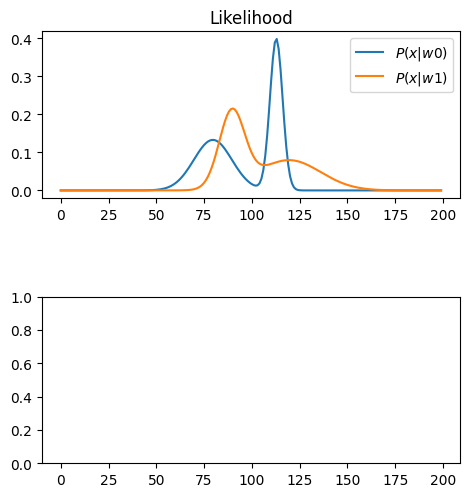

In [4]:
[ax1.plot(p_x_wj, label=f'$P(x|w{j})$') for j, p_x_wj in enumerate(p_x_w)]
ax1.set_title("Likelihood")
ax1.legend()
fig

### 1.3. Calculate the posterior distribution

The prior probabilities are $P(ω1) = P(ω2) = 0.5$. Calculate the posterior distribution and plot it for both states of nature. Compare to the likelihood for both states of nature. In both cases set the x axis limits to -3 to 15. 

If you were to change the probabilities to $P(ω1) = 0.9$, $P(ω2) = 0.1$, what do you think would happen to the posterior and why? Try it and see.

In [5]:
p_w1= np.array([0.5] * n)
p_w2 = np.array([0.5] * n)
p_w = [p_w1, p_w2]

In [6]:
def get_p_x(p_x_w, p_w):
    sum_array = p_x_w[0] * p_w[0]
    for j in range(1, len(p_w)):
        sum_array += (p_x_w[j] * p_w[j])
    return sum_array

In [7]:
def get_p_w_x(p_x_w, p_w):
    p_x = get_p_x(p_x_w, p_w)
    return [p_x_w[j] * p_w[j] / p_x for j in range(len(p_w))]

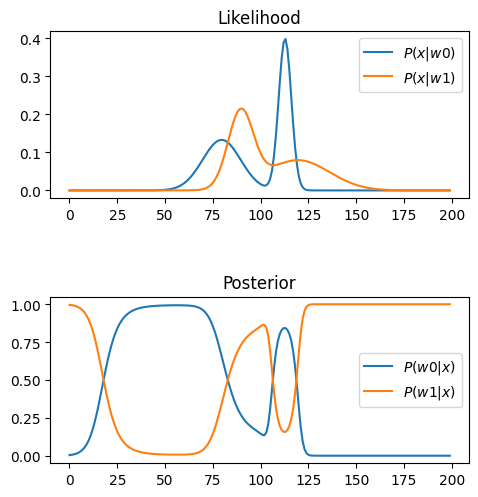

In [8]:
p_w_x = get_p_w_x(p_x_w, p_w)
[ax2.plot(p_wj_x, label=f'$P(w{j}|x)$') for j, p_wj_x in enumerate(p_w_x)]
ax2.set_title("Posterior")
ax2.legend()
fig

## 2. Classification with Bayes

In [9]:
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(2, 1)
ax1 = fig.add_subplot(grid[0, 0])
ax2 = fig.add_subplot(grid[1, 0], sharex=ax1)
fig.tight_layout(pad=5.0)

### 2.1. Make a dataset of 1000 samples with 2 informative features and no others.

In [10]:
# X: parameter/feature values
# y: classification data
X, y = datasets.make_classification(n_samples=1000, n_features=2, n_informative=2, n_redundant=0) 

### 2.2. Split the data up, using 33% of the data in the test set and the residual in the training set.

We wish to use this dataset to both train our model and also test whether it is doing the right thing. To do this we need to split it into a testing dataset and a training dataset. 

In [11]:
X_train, X_test, y_train, y_test = model_selection.train_test_split(
    X, y, test_size=0.33, random_state=42)

### 2.3. Fit a gaussian (normal) distribution on the training data.

In [12]:
clf = naive_bayes.GaussianNB()
clf.fit(X_train, y_train)

GaussianNB()

In [13]:
Xgrid, x1_line, x2_line = harray.get_grid_points(200, 200, (-6, 6))
classVals = np.reshape(clf.predict(Xgrid), [200, 200])

In [27]:
CS = ax1.contourf(x1_line, x2_line, classVals)
cbar = fig.colorbar(CS)
ax1.set_title("Classification")

Text(0.5, 1.0, 'Classification')

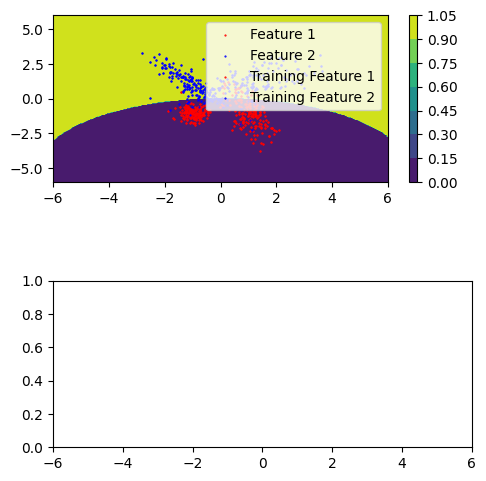

In [21]:
# First feature:
ax1.scatter(X_train[y_train == 0, 0], X_train[y_train == 0, 1], c='r', s=0.3, label='Training Feature 1')
# Second feature:
ax1.scatter(X_train[y_train == 1, 0], X_train[y_train == 1, 1], c='b', s=0.3, label='Training Feature 2')

ax1.legend()
fig

In [20]:
y_predicted = clf.predict(X_test)

accuracy = harray.accuracy(y_predicted, y_test)
print(f'{100 * accuracy} %')

88.7878787878788 %


### Plot image of posterior probabilities associated with each classifier.

In [36]:
# feature1_proba, feature2_proba = clf.predict_proba(X)

prob1Grid = np.reshape(clf.predict_proba(X)[:, 0], [200, 200])
# prob2Grid = np.reshape(feature2_proba, [200, 200])

CS = ax2.contourf(x1_line, x2_line, prob1Grid)
cbar = fig.colorbar(CS)
ax2.set_title("Class 1 Posterior Probability")

ValueError: cannot reshape array of size 1000 into shape (200,200)